# Td-Tp 3 : Perceptron multicouche de Rosenblatt

In [15]:
from public_tests import *

ModuleNotFoundError: No module named 'public_tests'

Selon le code fourni dans les notes de cours, nous pouvons utiliser Python pour implémenter un perceptron multicouche avec un vecteur de poids $w$ connu. 
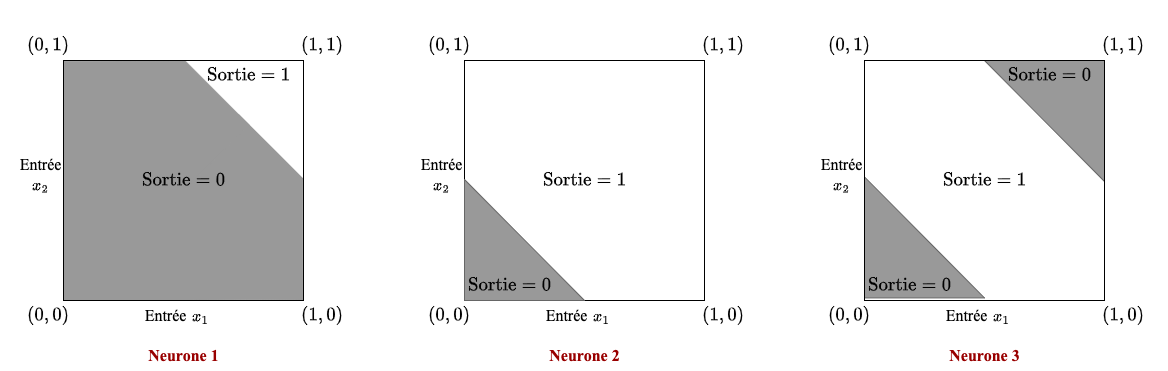
Étant donné les entrées et sorties suivantes :
$$X = \begin{bmatrix}0 & 0 \\ 0 & 1 \\ 1 & 0 \\ 1 & 1\end{bmatrix},\quad y = \begin{bmatrix}0 \\ 1 \\ 1 \\ 0\end{bmatrix}$$
Ici, les matrices de poids et les biais correspondantes sont:
$$w_1 = \begin{bmatrix}+1 & +1 \\ +1 & +1\end{bmatrix},\quad w_2 = \begin{bmatrix}-2 \\ +1\end{bmatrix}, \quad b_1 = \begin{bmatrix}-1.5 & -0.5\end{bmatrix},\quad b_2 = -0.5$$
La fonction d'activation est choisie comme une fonction sigmoïde avec le paramètre $a=10$,
$$\sigma(x) = \frac{1}{1+e^{-10x}}$$
En utilisant ce perceptron, nous pouvons résoudre le problème XOR.

In [1]:
import numpy as np


class MLP:
    def __init__(self):
        # (w1) poids d'entrée à couche cachée
        # (b1) biais d'entrée à couche cachée
        # (w2) poids de couche cachée à sortie
        # (b2) biais de couche cachée à sortie
        self.weight_input_hidden = np.array([[1, 1], [1, 1]])
        self.bias_input_hidden = np.array([-1.5, -0.5])
        self.weight_hidden_output = np.array([-2, 1])
        self.bias_hidden_output = -0.5

    def modify_weights(self, weight_input_hidden, bias_input_hidden, weight_hidden_output, bias_hidden_output):
        self.weight_input_hidden = weight_input_hidden
        self.bias_input_hidden = bias_input_hidden
        self.weight_hidden_output = weight_hidden_output
        self.bias_hidden_output = bias_hidden_output

    def sigmoid(self, x):
        ########## 1 ligne ##########
        return 1 / (1 + np.exp(-x))

        #############################

    def predict(self, inputs):
        # Couche d'entrée à la couche cachée
        # (z1) hidden_inputs = w1^T .* inputs + b1
        # (H1) hidden_outputs = sigma(z1)
        ######### 2 lignes ##########
        hidden_inputs = self.weight_input_hidden.T.dot(
            inputs) + self.bias_input_hidden
        hidden_outputs = self.sigmoid(hidden_inputs)

        #############################

        # Couche cachée à la couche de sortie
        # (z2) final_inputs = w2^T .* H1 + b2
        # (hat_y) final_output = sigma(z2)
        ######### 2 lignes ##########
        final_inputs = self.weight_hidden_output.T.dot(
            hidden_outputs) + self.bias_hidden_output
        final_output = self.sigmoid(final_inputs)

        #############################

        return final_output


# Création du modèle
mlp = MLP()

**Question** : Nous avons choisi une fonction sigmoïde avec le paramètre $a = 10$ comme fonction d'activation. Pourriez-vous expliquer pourquoi nous avons fait ce choix et analyser quel impact cela aura sur la construction du perceptron sous différentes valeurs de $a$ ?

**Réponse** : 







In [2]:
# Prédictions
inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
for input in inputs:
    prediction = mlp.predict(input)
    print(f"Input: {input}, Output: {prediction}")

Input: [0 0], Output: 0.38052737803921666
Input: [0 1], Output: 0.3469162437740144
Input: [1 0], Output: 0.3469162437740144
Input: [1 1], Output: 0.283463832038694


### Exercice 1
Lorsque le problème devient complexe, il est souvent impossible de déterminer initialement comment sélectionner les poids. La meilleure approche consiste à trouver un ensemble de poids approprié en utilisant des règles Delta lorsque vous connaissez la manière de classer l'ensemble de données.

$$e^k = y^k-\hat{y}^k$$
$$\min E = \frac{1}{2}\left(e^k\right)^2$$
$$\Delta w(k) = \eta e^k.x^k$$

**Remarqu : Nous avons déjà souligné que les changements de poids peuvent converger vers un ensemble spécifique de valeurs lorsque l'ensemble de données est raisonnable.**

Pour résoudre le même problème XOR, veuillez utiliser le code pour implémenter la règle Delta afin de trouver les poids appropriés.

*Indication 1*

Nous savions déjà que la valeur des poids est étroitement liée à la fonction d'activation choisie. Par conséquent, nous utilisons une approche itérative pour déterminer des poids appropriés qui s'adaptent de manière adaptative à différentes fonctions d'activation. En prenant l'exemple du problème XOR mentionné précédemment, nous pouvons enfin identifier précisément comment les poids changent lorsque le paramètre $a$ est égal à 1.

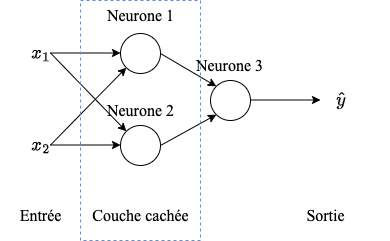

**Question** : Il s'agit d'un perceptron multicouche. Veuillez noter le processus de calcul entre chaque couche en fonction de la figure ci-dessous.

**Réponse** :






*Indication 2*

Lors de l'initialisation des paramètres de ce perceptron multicouche simple, nous devons d'abord déterminer les paramètres suivants :
- `input_dim` : la dimension de l'échantillon d'entrée, qui doit être la dimension $d=2$ dans ce cas.
- `hidden_dim` : La dimension de la couche cachée peut être choisie par l'utilisateur. Ici, la dimension $h=2$ (Neurone 1 et Neurone 2) est sélectionnée selon la figure ci-dessus.
- `output_dim` : la dimension de la couche de sortie, qui doit être de dimension $q=1$ dans ce cas.
- `w1` : $w_1 \in \mathbb{R}^{d \times h}$, avec une dimension = `input_dim` * `hidden_dim`.
- `w2` : $w_2 \in \mathbb{R}^{h \times q}$, avec une dimension = `hidden_dim` * `output_dim`.
- `b1` : $b_1 \in \mathbb{R}^{h}$
- `b2` : $b_2 \in \mathbb{R}^{q}$

In [3]:
# Initialisation des poids et des biais de manière aléatoire
np.random.seed(1)
input_dim = 2
hidden_dim = 2
output_dim = 1
w1 = np.random.uniform(size=(input_dim, hidden_dim))
w2 = np.random.uniform(size=(hidden_dim, output_dim))
b1 = np.random.uniform(size=(hidden_dim))
b2 = np.random.uniform(size=(output_dim))
########## 4 lignes ##########


#############################

In [4]:
# Définition de la fonction d'activation sigmoïde
def sigmoid(x):
    ########## 1 ligne ##########
    return 1 / (1 + np.exp(-x))

    #############################

# Fonction de dérivée de la fonction d'activation sigmoïde


def sigmoid_derivative(x):
    ########## 1 ligne ##########
    return np.exp(-x) / (1 + np.exp(-x))**2

    #############################


# Données d'entrée et de sortie pour le problème XOR
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

In [5]:
# Nombre d'itérations et taux d'apprentissage
epochs = 10000
learning_rate = 0.1  # eta

# Entraînement du réseau
for epoch in range(epochs):
    # Propagation vers l'avant
    # (z1) hidden_layer_input = w1^T * X + b1
    # (H1) hidden_layer_output = sigma(z1)
    # (z2) output_layer_input = w2^T * H1 + b2
    # (hat_y) output_layer_output = sigma(z2)
    ######### 4 lignes ##########
    z1_hat = X.dot(w1) + b1  # shape: (样本数量，隐藏层神经元数量) = (4, 2)
    h1_hat = sigmoid(z1_hat)  # shape:  (样本数量，隐藏层神经元数量) = (4, 2)
    z2_hat = h1_hat.dot(w2) + b2  # shape: （样本数量，输出层神经元数量） = (4, 1)
    y_hat = sigmoid(z2_hat)  # real shape: （样本数量，输出层神经元数量） = (4, 1)

    # 为啥我这里都没有 error 项

    # 注意梯度函数的 参数（带 hat） 和 函数符号 不一样
    # at y_hat (n_samples, output) = (4, 1), 向量化
    d_res_div_d_y = y_hat - y
    # at z2_hat (n_samples, output) = (4, 1)
    d_y_div_d_z2 = sigmoid_derivative(z2_hat)
    d_res_div_d_z2 = d_res_div_d_y * d_y_div_d_z2
    # at z1_hat, shape: (hidden, output) = (2, 1)
    # 线性层所以与 z1_hat 无关
    d_z2_div_d_h1 = w2
    d_res_div_d_h1 = d_res_div_d_z2.dot(d_z2_div_d_h1.T)
    # at h1_hat, shape: (n_samples, hidden) = (4, 2)
    d_h1_div_d_z1 = sigmoid_derivative(z1_hat)
    d_res_div_d_z1 = d_res_div_d_h1 * d_h1_div_d_z1
    # at x_input, shape: (input, hidden) = (2, 2)

    # shape: (w2 dim, z2 dim) = (2, 1)，dot 自带样本维求和，求和等于说把几个样本效果一起算
    d_res_div_d_w2 = h1_hat.T.dot(d_res_div_d_z2)
    # d_z2 / d_b2 = 1.  shape: (1, 1)，手动求和
    d_res_div_d_b2 = np.sum(d_res_div_d_y * d_y_div_d_z2, axis=0)

    d_res_div_d_w1 = X.T.dot(d_res_div_d_z1)
    d_res_div_d_b1 = np.sum(d_res_div_d_z1, axis=0)

    w2 -= learning_rate * d_res_div_d_w2
    b2 -= learning_rate * d_res_div_d_b2
    w1 -= learning_rate * d_res_div_d_w1
    b1 -= learning_rate * d_res_div_d_b1

    #############################

    # Calcul de l'erreur
    # (e_hat_y) error = sortie objective - sortie actuelle
    ########## 1 ligne ##########
    # e_hay_y = y - hat_y

    #############################

    # Rétropropagation de l'erreur
    # (Δhat_y) d_output = e_hat_y * sigma’(hat_y)
    # (e_H1) error_hidden_layer = d_output.dot(w2.T)
    # (ΔH1) d_hidden_layer= e_H1 * sigma’(H1)
    ######### 3 lignes ##########
    # d_output = e_hay_y * sigmoid_derivative(hat_y)

    #############################

    # Mise à jour des poids et des biais
    # w2 = w2 + eta * Δhat_y * H1 #exemple : w2 += hidden_layer_output.T.dot(d_output) * learning_rate
    # b2 = b2 + eta * sum(Δhat_y)
    # w1 = w1 + eta * ΔH1 * X
    # b1 = b1 + eta * sum(ΔH1)
    ######### 4 lignes ##########

    #############################

# Affichage des résultats

mlp = MLP()
mlp.modify_weights(w1, b1, w2, b2)

inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
for input in inputs:
    prediction = mlp.predict(input)
    print(f"Input: {input}, Output: {prediction}")

Input: [0 0], Output: [0.07303441]
Input: [0 1], Output: [0.93085368]
Input: [1 0], Output: [0.93123629]
Input: [1 1], Output: [0.07563293]


In [ ]:
print(w1)
print(w2)
print(b1)
print(b2)

### Exercice 2
Nous sommes maintenant prêts à résoudre un problème de classification binaire plus difficile !
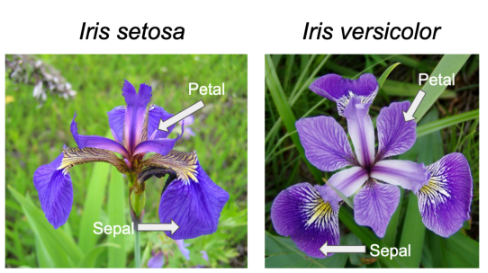
Nous aimerions classer les deux types de fleurs d’iris ci-dessus en fonction de leurs caractéristiques florales. L'iris setosa a maintenant été marqué comme 1 et l'iris versicolor comme 0 afin que la fonction sigmoïde puisse être utilisée directement comme fonction d'activation.

In [ ]:
import pandas as pd

Iris_dataset = pd.read_csv('Iris_2type.csv', encoding='unicode_escape')
Iris_dataset

In [ ]:
import csv
with open('Iris_2type.csv', newline='') as csvfile:
    reader = csv.reader(csvfile)
    next(reader)
    selected_columns = [[float(row[i]) for i in range(0, 4)] for row in reader]
    inputs = np.array(selected_columns)
with open('Iris_2type.csv', newline='') as csvfile:
    reader = csv.reader(csvfile)
    next(reader)
    selected_column = [int(row[-1]) for row in reader]
    outputs = np.array(selected_column).reshape(-1, 1)

# Données d'entrée et de sortie pour le problème XOR
X = inputs
y = outputs

In [ ]:
## Initialisation des poids et des biais de manière aléatoire
np.random.seed(1)
input_dim = 4
hidden_dim = 5
output_dim = 1
output_dim = 1
# w1 = np.random.uniform(size=(...))
# w2 = np.random.uniform(size=(...))
# b1 = np.random.uniform(size=(...))
# b2 = np.random.uniform(size=(...))
######### 4 lignes ##########




#############################

## Définition de la fonction d'activation sigmoïde
def sigmoid(x):
    ########## 1 ligne ##########
    
    #############################

# Fonction de dérivée de la fonction d'activation sigmoïde
def sigmoid_derivative(x):
    ########## 1 ligne ##########
    
    #############################

## Nombre d'itérations et taux d'apprentissage
epochs = 100000
learning_rate = 0.1

## Entraînement du réseau
for epoch in range(epochs):
    ## Propagation vers l'avant
    # (z1) hidden_layer_input = w1^T * X + b1
    # (H1) hidden_layer_output = sigmoid(z1)
    # (z2) output_layer_input = w2^T * H1 + b2
    # (hat_y) output_layer_output = sigmoid(z2)
    ######### 4 lignes ##########
    
    
    #############################

    ## Calcul de l'erreur
    # (e_hat_y) error = sortie objective - sortie actuelle
    ########## 1 ligne ##########
    
    #############################

    ## Rétropropagation de l'erreur
    # (Δhat_y) d_output = e_hat_y * sigma’(hat_y)
    # (e_H1) error_hidden_layer = d_output.dot(w2.T)
    # (ΔH1) d_hidden_layer = e_H1 * sigma’(H1)
    ######### 3 lignes ##########
    
    
    #############################

    ## Mise à jour des poids et des biais
    # w2 = w2 + eta * Δhat_y * H1 #exemple : w2 += hidden_layer_output.T.dot(d_output) * learning_rate
    # b2 = b2 + eta * sum(Δhat_y)
    # w1 = w1 + eta * ΔH1 * X
    # b1 = b1 + eta * sum(ΔH1)
    ######### 4 lignes ##########
    
    
    #############################

# Affichage des résultats
print("Sortie prédite après entraînement :")
print(output_layer_output)

### Exercice supplémentaire
Nous considérons maintenant la construction d’un perceptron de Rosenblatt basée sur une autre formulation de mise à jour. Définissons la fonction du perceptron :
$$J(w) = \sum_{x\in X(w)}\left(-\langle w, x\rangle\right)$$
Ici, $X(w)$ représente l'ensemble des échantillons mal classés en fonction du vecteur de poids $w$.

**Remarque : $J(w)$ est défini comme zéro s’il n’y a pas d’échantillons mal classés.**

1. Démontrer géométriquement que $J$ est proportionnel à la somme des distances euclidiennes entre les échantillons mal classés et la limite de décision.
2. Trouver le gradient de $J(w)$ par rapport au vecteur de poids $w$.
3. En utilisant les résultats obtenus en 2, démontrer que la mise à jour du poids du perceptron est : $$ w(k+1) = w(k) + \eta\sum_{x\in X(w(k))} x$$ Ici, $X(w(k))$ représente l'ensemble des échantillons qui ont été mal classés à l'aide du vecteur de poids $w(k)$, et $\eta$ est le paramètre de taux d'apprentissage.
4. Étant donné un ensemble d'entrées $x$ et leur classification correspondante, utilisez cette formule de mise à jour pour compléter l'implémentation Python du perceptron.